Andiswa Khwela
June 2020

# Modelling The Dynamics Of The Spread Of The Novel COVID-19 Using The SIR Model

### Introduction 

Mathematical models are very useful for building, comparing and testing theories. In epidemiology they are used to for evaluation of various prevention, therapeutic and control programs developed to combat diseases and infections<font color=blue> (Hethcote, 1994)</font>. The SIR model is part of the compartmental models used to simplify the mathematical modelling of infectious diseases in epidemiology <font color=blue>(Capasso and Serio,1978)</font>.The SIR model was first descibed by McKendric and Kermack in 1927, this model has been really useful in modelling and predicting the future of pandemics <font color=blue>(Capasso and Serio,1978)</font>. The way that this model works is, the population is divided into compartments *viz.*  S(Susceptible), I(Infective) and R(Recovered). The susceptible  are those individuals that have not been yet infected and are susceptible to infection, the infectives is that proportion of the population that has been infected and has the capability of infecting others and the recovered are those that have recovered from the infection and in this model it is assumed they they acquire immunity, meaning they cannot get infected again and cannot infect others <font color=blue>(Pathak *et. al.,*2010)</font>. Those that have deceased due to the disease are also incorporated into the recovered since they cannot be counted as infectives or susceptibles. Natural death and birth rates are not taken into account in the SIR model because it is assumed that the dynamics of the spread of the infection are so fast that these rates become negligible with respects to the total population size <font color=blue>(McCallum*et. al*.,2001)</font>. 

Throghout human history the worlds' population has faced a number of pandemics, with the plague being recorded as the most fatal <font color=blue> (Cascella *et. al.,* 2020)</font>. To the present day the world is currently dealing with the novel coronavirus (COVID-19) pandemic which is a highly contagious disease that causes respiratory infections <font color= blue>(Randolph and Barreiro,2020)</font>. According to the World Health Organisation (WHO) COVID-19 is the 17th member of the of the coronavirus family, it falls under 2$\beta$ group and based on the genetic sequence it is significantly different from the previous SARS-Cov <font color=blue>(Rothan and Bryreddy, 2020)</font>. The fast pace of person to person transmition of COVID-19 has resulted in the whole world being on standstill <font color=blue>(Mullard and Asher,2020)</font>.Ealier reports had said this disease is primarily transmitted from person to person through contact and respiratory droplets but the latest reports suggest that it may also spread indirectly through contaminated surfaces and airbone transmition <font color=blue>(Shereen et al., 2020)</font>. This pandemic has managed to spread almost all over the world in such a short space of time. As of date the 26 June there are 9,413,289 confirmed cases of COVID-19, including 482,730 deaths, reported to WHO (https://covid19.who.int). At present there is no specific anti-viral drug or vaccine against this disease. Scientists all over the world are actively working on developing a pre and post-exposure prophylaxis for COVID-19 but at present the best countermeasure against the spread is isolation <font color=blue>(Rothan and Bryreddy,2020)</font> . The disease tends to spread faster with human to human interaction in crowded spaces hence almost the entire world is under lockdown <font color=blue>(Milne and Xie,2020)</font>.  In this study the effectiveness of prevantive methods such as social distancing and vaccines and curative methods such as post-exposure drug treatments will tested using the SIR model. 






### Methods 

The equations which govern the SIR model and which were be used are as follows:
 
 \begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}
  
  
Where S,I and R stand for the proportions of the populations as been mentioned above, $\beta$ and $\gamma$ are the infection and recovery rate respectively and N is the total number of people in the population <font color=blue>(Nicho,2010)</font>. The individuals in the population are expected to progress between the different compartments as the dynamics of the spread of the disease change over time <font color=blue>(Atkeson,2020)</font>. In additon to the traditional SIR model equations the Runge-Kutta equations (stated below)  were also used for analysis. To test the hypothesis proposed above the values of $\beta$ and $\gamma$ were adjusted. $\beta$ was decreased and $\gamma$ was increased,first individually and then jointly. 



In [39]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import os
backupdir = os.getcwd()
os.chdir(backupdir)

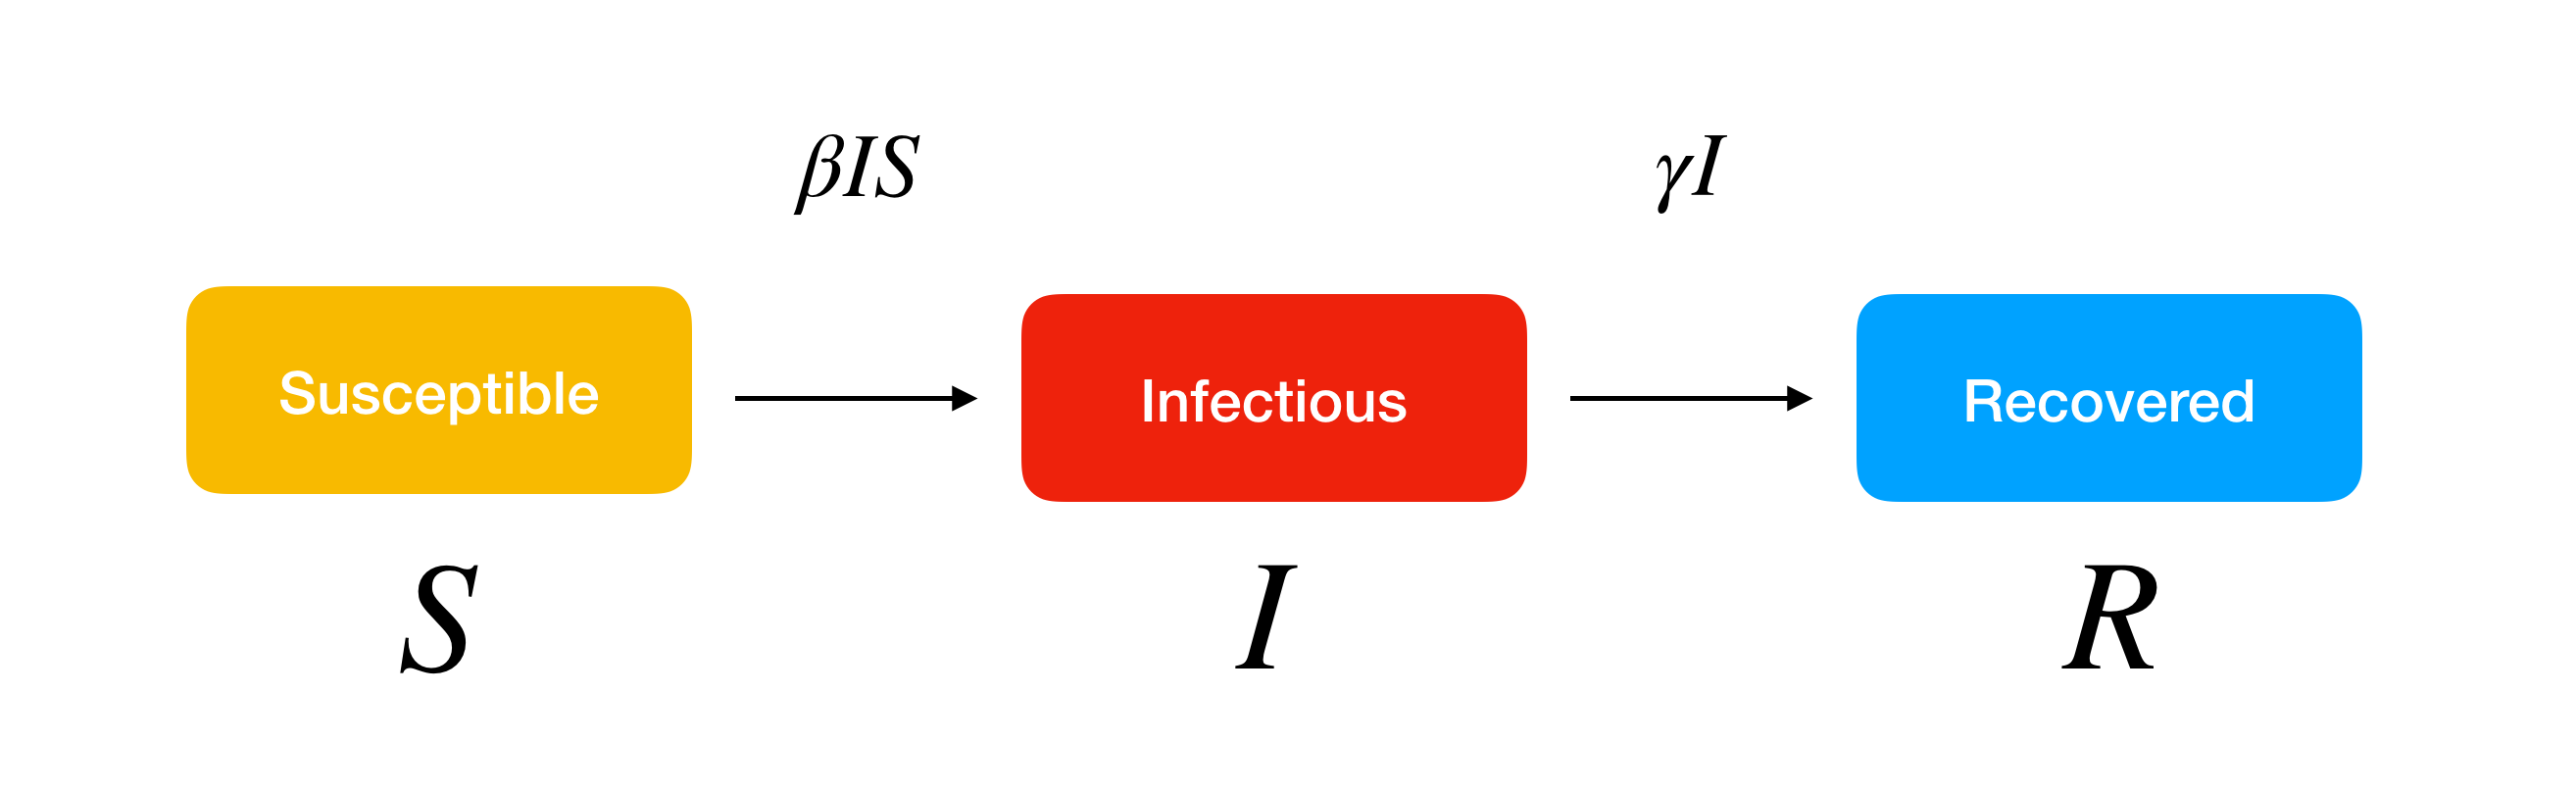

In [40]:
from IPython.display import Image
Image(filename='SIR1.png')

__Figure 1: Representation of how individuals in the population are expected to flow through the different compartments__ adapted from.<font color=blue>(Sasaki, 2020)</font>

The following equations/codes are from https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions an online python notebook that is regularly updated based on ongoing observations and predictions of the spread of COVID-19 globally. 

In [41]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta *a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [42]:
# To sovle the system the 4th order equations had to be deloveped and they were developed using the Runge-Kutta method
#(susceptible a, infected b aned r)

def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [43]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    amma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec


### Results 


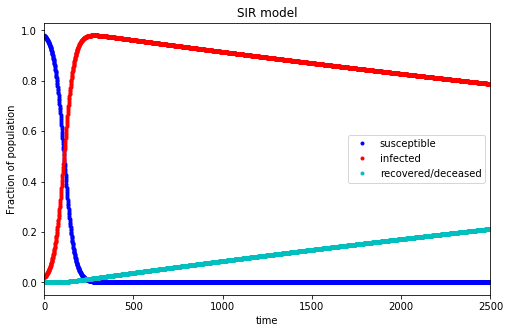

In [44]:
N = 50*(10**6)
b0 = 0.02
beta = 3.5
gamma = 0.01
hs = 0.01

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,2500)
#plt.savefig('SIR_example.png')
plt.show()

__Figure 2: Forecast of the the spread of COVID-19 as predicted by SIR model__

Figure 2 was obtained for N=world population, β=3,5 and γ=0.01. These were used as the intitial or default paramaters before any methods were put in place to combat the spread if the disease. The independent variable is time in days and the dependant variable is fraction of the population in decimals with 1.0 being all the individuals in the population.  



### Preventative methods that slow down infection rate(decrese $\beta$)

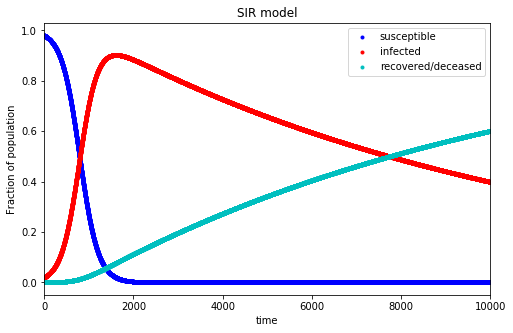

__Figure 3: Forecast of how preventative measures will affect the spread of COVID-19__ 

**Observation:**  Decreasing $\beta$ to half of the initial value results in very slight changes in how the disease affects the population overtime.In the initial curve with $\beta$=3,5 the infection rate reached the plateau after 200 days, when the infection rate is halved ($\beta$=1,75) it takes double the time to reach the plateau(time=400 days) (not shown). A futher decrease in the infection rate, $\beta$ =0.5 yields figure 3 (above), where the proportion of the population that is infected is no longer increasing exponentially, but now increases very gradually over time until it reaches the plateau then starts to decrease gradually over time as soon as the recovered becomes greater than the susceptible.This results in a smoother curve and an even longer time to reach infection plateau,time=1500 days. The plateau reached when $\beta$= 0,5 is lower than that reached in the previous bigger values of beta. Fraction of the population infected at peak of infection rate is decreased from 1.0 to 0.9.




### Curative methods that increase recovery rate($\gamma$)

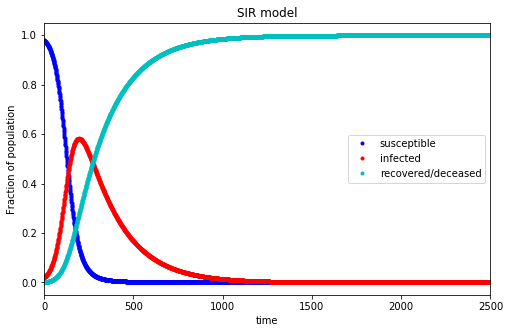

__Figure 4: A forecast on how the implementation of curative methods will affect the spread of Covid-19__

__Observation:__ When $\gamma$ was increased to 0.05(not shown) there were  minor changes in the way the disease progresses over time. It took exactly the same time to reach the plateau time=200 days but, the recovery rate increased at a higher pace which caused the infected to decrease at the very same higher rate. The value of the plateau
showed a slight decrease. A much larger increase in $\gamma$ sigficantly changed the infection rate. Increasing $\gamma$ to 0.5 (figure 4 above) changed the peak of the infection rate from 1.0 to 0.6 and after that the infection rate took a sharp curve and decreased almost exponentially until it became flat.



### Applying both prevantative and curative methods 

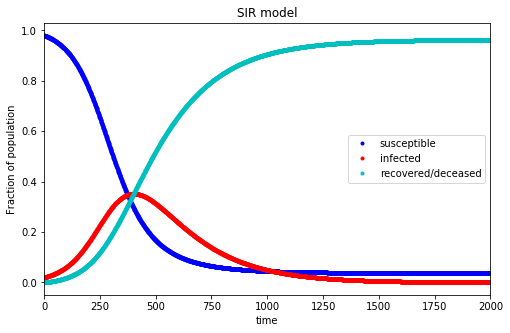

__Figure 5 Prediction of how employing both preventative and curative methods will impact the spread of COVID-19__

__Observation:__ Applying both curative and preventative methods causes a significant decrease in the plateau of the infected and also increases the time it takes for the infected to reach that plateau.Thie figure above was obtained from the values $\beta$ =1.7 and $\gamma$ = 0.5.The infected reaches a plateau of 0.38 and the time it took to reach it was 400 days.




The values of $\beta$ and $\gamma$ were adjusted based on the estimations and predictions made by <font color=blue> Anderson *et. al.,* (2020) and Atkerson,(2020)</font>

### Discussion 

The overall progression of the disease irregardless of the values of $\beta$ and $\gamma$ is as follows, the infected curve increases for a certain period until it eventually reaches the maximum peak of infections then it starts to decrease given that the individuals recover or die from the disease. The susceptible portion of the population decreases as the infection is transmitted from one person to the next, until it reaches an absorbent state 0. Which is reached when the infected reaches its' treshold and there are no new infections taking place as seen in figure 2 when the entire population had been infected and individuals were now recovering or when countermeasures  are susceeding against the spread of the infection as seen in the other figures(3-5). From the scenarios created above applying only prevantative measures proved to have remarkably small benefits. Decreasing the infection rate slows down how fast the disease spreads over time(Figure 3), it increases the time it takes for the infectives to reach the peak. There is a decrease in the actual value of the peak  that is reached by the infectives,it decreased by 0.14 when $\beta$ =0.5 (Figure 3).This means the overall fraction of the population that is infected before infection rate starts to decrease, goes down very slightly with each decrease in $\beta$. With the current preventative measures such a social distancing and sanitizing it is likely that the health system will still be overwhelmed, as these prevantative measures only push the date at which the infection treshold is reached <font color=blue> (Atkeson *et. al.,*2020)</font>.On average countries are expected to feel the pressure when more than 1% of the population becomes infected,but this may vary depending on how developed the country is and how well invested in resources it is <font color=blue> (Anderson *et. al.,*2020)</font>. Preventative measures can be useful in terms of perhaps allowing time to heavily invest in resources needed to care of the sick since they don't have a significant effect on the actual number of those that eventually fall  sick. The effectiveness of social distancing measures is highly limited by the willingness of the population to adhere to them <font color=blue> (Milne and Xie, 2020)</font> and it has a devastating economic impact<font color=blue> (Atkeson *et al.,*2020)</font>. However preventative methods are not only social, there also some thereputical measures like vaccines that fall under preventative measures which would likely be more effective in protection against infection,but developing the vaccine is proving to be a rather difficult task <font color=blue> (Mullard, 2020)</font>. Generally developing a vaccine is a tedious task and may take years, for example the vaccine for the Ebola virus was only approved in 2016, 3 years after the outbreak (https://www.nature.com/articles/d41586-019-03490-8). This is particularly often the case in viral diseases becauses virus' genetic make-up is RNA which is single stranded, making it very easy for them to mutate and any cure or vaccines made for that specific RNA become obsolete once the virus has mutated. (https://www.labroots.com/trending/drug-discovery-and-development/16869/difficult-develop-vaccine-coronavirus). Additionally vaccines must go through 6 developmental stages before reaching the market this means that by the time a vaccine has been developed and approved, the emergency may have longed passed  (https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31252-6/fulltext).  
    
    
With such challenges facing preventative methods, it begs the question are curative methods better? Curative methods have been shown to have no effect on how long it takes for the infection to reach its threshold but rather curative methods decrease infection thereshold quite significantly (figure 4) as compared to preventative methods. The treshold decreased by 0.4 when $\gamma$= 0.5. The reason for this is that curative methods decrease the duration of the infectious phase by causing the infected to recover at a higher rate,after recovery the recovered individuals acquire immmunity and cannot infect others <font color=blue>(Mondal *et al*.,2020)</font>. This is based on the principle of herd immunity.Which defined as indirect protection/resistance  against  the spread of an infectious disease that occurs when a large portion of the population gains immunity <font color=blue>(Randolph *et al.,*2020)</font>. In reality there is no evidence that proves that individuals that recover from COVID-19 get immuninity but in this study, for the sceniors created above it was assumed that was the case because in the SIR model individuals cannot move back into the susceptible or infected group after recovery <font color=blue>(Nicho and Joanna, 2010)</font>. Herd immunity can be achieved in two ways, through vaccination or recovery after infection, and it is attained when about 60%-70% of the populations gets immunity <font color=blue>(Mondal *et al*.,2020)</font>. In this study herd immunity was  achieved through recovery that was induced by curative methods (figure 4). This happened when the recovery rate reached 0.6 (figure 4), meaning about 60% of the population had recovered and had gained immmunity and that is why infection rate then starts to decrease almost exponentiallly until it reaches 0. Even though treatment drugs promise to do better than vaccines,it's often cheaper to prevent occurance of an infection than to cure it <font color=blue>(Kalil *et. al.,*2020)</font> also, in a population some individuals are more susceptible than others which means even with recovery others stand a better chance than others hence it's often preffered that vaccines be the first measure of therapeutics to be put in place over allowing individuals to contract the disease and then treating them <font color=blue>(Mondal *et al*.,2020)</font>.  
    
It seems as though curative methods would be more effective in combating the spread of COVID-19. But the question is what would be the response if both curative and prevantative methods were to be employed? Employing both curative and preventative methods at once proved to be more benefitial than having either of the methods individually (figure 5). It decreases the plateau of the infected whilst also increasing the time it takes to reach that plateau. The maximum proportion of the population that would be affected at the threshold of infection should both methods be applied would be about 0.38 which is about 38% of the population in 500 days, which is more than a year. Out of three options the combitionation of the both prevantative and curative methods is the best option to combat the spread of this pandemic. 
   

### Conclusions

In the meantime social distancing and sanitizing are buying time by preventing the disease to reach it's treshold whilst scientists are working on repurposing already existing drugs and developing new drugs and vaccinnes aganist COVID-19. Repurposing of already existing medications can serve as a bridge while vaccines are being developed, but to completely drive this pandemic to eradication the optimal combination of both prevantative and curative measures would have to be found and applied timely. 

### References

ANDERSON, R. M., HEESTERBEEK, H., KLINKENBERG, D. & HOLLINGSWORTH, T. D. J. T. L. 2020. How will country-based mitigation measures influence the course of the COVID-19 epidemic? 395, 931-934.

ATKESON, A. 2020. What will be the economic impact of covid-19 in the us? rough estimates of disease scenarios. National Bureau of Economic Research.

CAPASSO, V. & SERIO, G. J. M. B. 1978. A generalization of the Kermack-McKendrick deterministic epidemic model. 42, 43-61.

CASCELLA, M., RAJNIK, M., CUOMO, A., DULEBOHN, S. C. & DI NAPOLI, R. 2020. Features, evaluation and treatment coronavirus (COVID-19). Statpearls. StatPearls Publishing.

Covid19.who.int. 2020. WHO Coronavirus Disease (COVID-19) Dashboard. [online] Available at: <https://covid19.who.int/> [Accessed 26 June 2020].

HETHCOTE, H. W. 1994. A thousand and one epidemic models. Frontiers in mathematical biology. Springer.

Kaggle.com. 2020. COVID Global Forecast: SIR Model + ML Regressions. [online] Available at: <https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions> [Accessed 20 June 2020].

KALIL, A. C. J. J. 2020. Treating COVID-19—off-label drug use, compassionate use, and randomized clinical trials during pandemics. 323, 1897-1898.

LabRoots. 2020. Why Is It So Difficult To Develop A Vaccine For Coronavirus? | Drug Discovery And Development. [online] Available at: <https://www.labroots.com/trending/drug-discovery-and-development/16869/difficult-develop-vaccine-coronavirus> [Accessed 24 June 2020].

MCCALLUM, H., BARLOW, N., HONE, J. J. T. I. E. & EVOLUTION 2001. How should pathogen transmission be modelled? 16, 295-300.

MILNE, G. J. & XIE, S. J. M. 2020. The effectiveness of social distancing in mitigating COVID-19 spread: a modelling analysis.

MONDAL, S., MUKHERJEE, S. & BAGCHI, B. J. A. P. A. 2020. Attainment of Herd Immunity: Mathematical Modelling of Survival Rate.

MULLARD, A. J. T. L. 2020. COVID-19 vaccine development pipeline gears up. 395, 1751-1752.

Nature.com. 2020. ‘Make Ebola A Thing Of The Past’: First Vaccine Against Deadly Virus Approved. [online] Available at: <https://www.nature.com/articles/d41586-019-03490-8> [Accessed 24 June 2020].


NICHO, J. J. U. J. O. M. M. O. T. 2010. The SIR Epidemiology Model in Predicting Herd Immunity. 2, 8.

PATHAK, S., MAITI, A., SAMANTA, G. J. N. A. M. & CONTROL 2010. Rich dynamics of an SIR epidemic model. 15, 71-81.

RANDOLPH, H. E. & BARREIRO, L. B. J. I. 2020. Herd Immunity: Understanding COVID-19. 52, 737-741.

ROTHAN, H. A. & BYRAREDDY, S. N. J. J. O. A. 2020. The epidemiology and pathogenesis of coronavirus disease (COVID-19) outbreak. 102433.

Sasaki, K., 2020. COVID-19 Dynamics With SIR Model. [online] The First Cry of Atom. Available at: <https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html> [Accessed 26 June 2020].

SHEREEN, M. A., KHAN, S., KAZMI, A., BASHIR, N. & SIDDIQUE, R. J. J. O. A. R. 2020. COVID-19 infection: Origin, transmission, and characteristics of human coronaviruses.



